In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

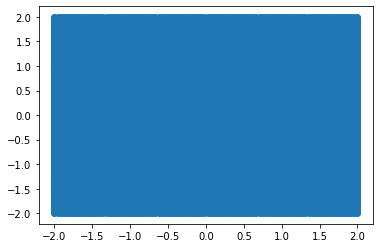

In [57]:
n = 100

xs = np.linspace(-2, 2, n)
ys = np.linspace(-2j, 2j, n, dtype=complex)
xx, yy = np.meshgrid(xs, ys)
cs = xx + yy
plt.scatter(cs.real, cs.imag)

In [58]:
n_iter = 50

cs_flat = cs.reshape(-1)
zs = np.zeros((cs_flat.size, n_iter), dtype=complex)
zs[:,0] = cs_flat
for i in np.arange(n_iter-1):
    zs[:, i+1] = np.square(zs[:, i]) + cs_flat

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in square
  import sys


In [69]:
divergence = np.where(np.abs(zs) > 1e3, 0, 1).sum(axis=1)

/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in absolute
  """Entry point for launching an IPython kernel.
/opt/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


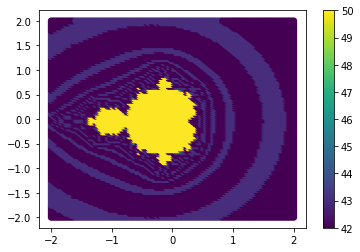

In [71]:
plt.scatter(cs.real, cs.imag, c=divergence.reshape(n, n))
plt.colorbar()
plt.savefig('q1.png')

In [10]:
## What to use as the threshold for "diverge"?

In [11]:
from scipy.integrate import odeint

In [59]:
def derivatives(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [60]:
N = 1000

s0 = 999
i0 = 1
r0 = 0

y0 = (s0, i0, r0)

t = np.arange(200)

betas = 1/np.array([6, 8, 10])
gammas = 1/np.array([14, 21, 28])

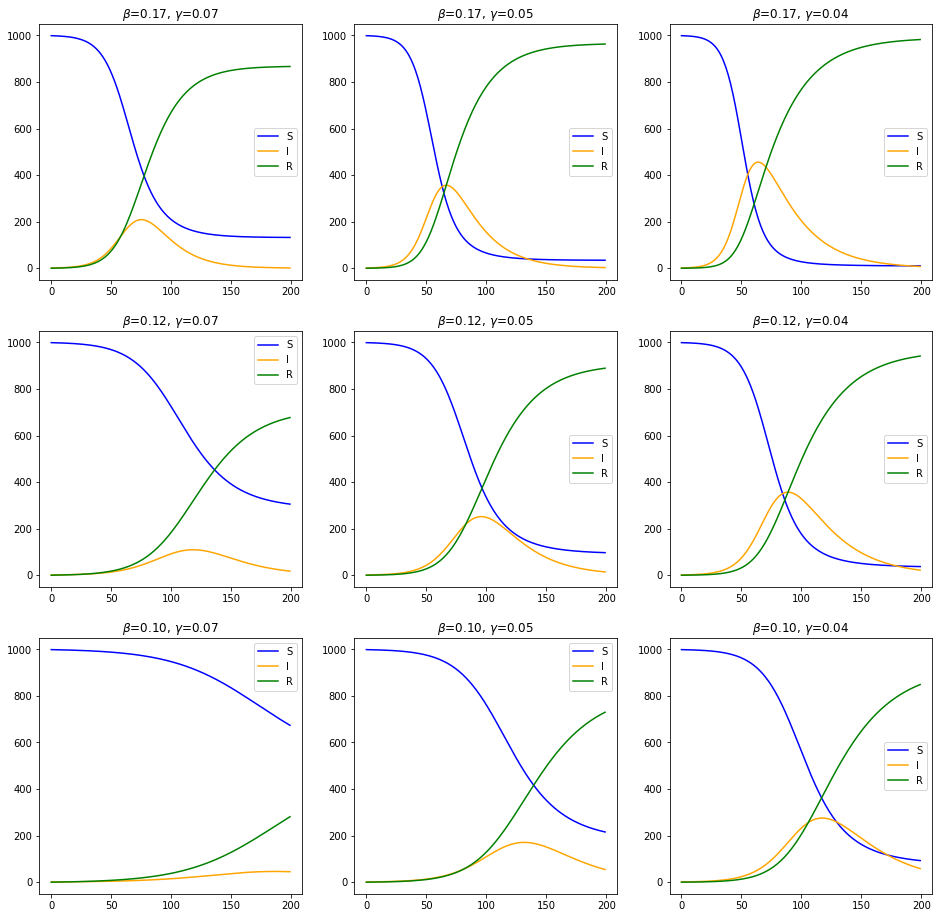

In [62]:
fig, ax = plt.subplots(nrows=len(betas), ncols=len(gammas), figsize=(16, 16))

for idx_beta, beta in enumerate(betas):
    for idx_gamma, gamma in enumerate(gammas):
        y = odeint(derivatives, y0, t, (beta, gamma, N))
        S, I, R = y[:, 0], y[:, 1], y[:, 2]
        
        ax[idx_beta][idx_gamma].set_title(fr'$\beta$={beta:.2f}, $\gamma$={gamma:.2f}')
        ax[idx_beta][idx_gamma].plot(t, S, label='S', c='b')
        ax[idx_beta][idx_gamma].plot(t, I, label='I', c='orange')
        ax[idx_beta][idx_gamma].plot(t, R, label='R', c='g')
        ax[idx_beta][idx_gamma].legend()
    
plt.savefig('q2.png')

In [63]:
def derivatives2(y, t, beta, gamma, mu, N):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

In [66]:
N = 1000

s0 = 999
i0 = 1
r0 = 0
d0 = 0

y0 = (s0, i0, r0, d0)

t = np.arange(700)

betas = 1/np.array([6, 8, 10])
gammas = 1/np.array([14, 21, 28])
mu = .05

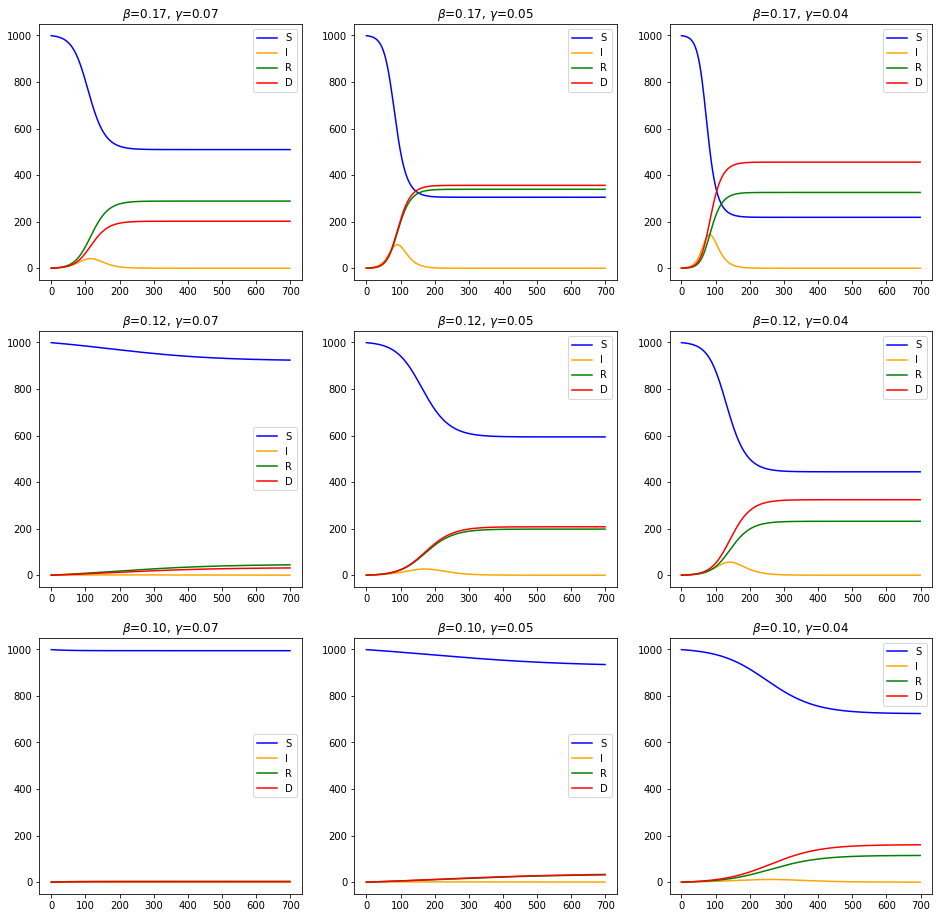

In [67]:
fig, ax = plt.subplots(nrows=len(betas), ncols=len(gammas), figsize=(16, 16))

for idx_beta, beta in enumerate(betas):
    for idx_gamma, gamma in enumerate(gammas):
        y = odeint(derivatives2, y0, t, (beta, gamma, mu, N))
        S, I, R, D = y[:, 0], y[:, 1], y[:, 2], y[:, 3]
        
        ax[idx_beta][idx_gamma].set_title(fr'$\beta$={beta:.2f}, $\gamma$={gamma:.2f}')
        ax[idx_beta][idx_gamma].plot(t, S, label='S', c='b')
        ax[idx_beta][idx_gamma].plot(t, I, label='I', c='orange')
        ax[idx_beta][idx_gamma].plot(t, R, label='R', c='g')
        ax[idx_beta][idx_gamma].plot(t, D, label='D', c='red')
        ax[idx_beta][idx_gamma].legend()